In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
import time
from datetime import datetime
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)


In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | chokurdakh
Processing Record 2 of Set 13 | sataua
City not found. Skipping...
Processing Record 3 of Set 13 | carnarvon
Processing Record 4 of Set 13 | paamiut
Processing Record 5 of Set 13 | puerto ayora
Processing Record 6 of Set 13 | katsuura
Processing Record 7 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 13 | hilo
Processing Record 9 of Set 13 | norman wells
Processing Record 10 of Set 13 | vao
Processing Record 11 of Set 13 | punta arenas
Processing Record 12 of Set 13 | yate
Processing Record 13 of Set 13 | khatanga
Processing Record 14 of Set 13 | saleaula
City not found. Skipping...
Processing Record 15 of Set 13 | luanda
Processing Record 16 of Set 13 | busselton
Processing Record 17 of Set 13 | sistranda
Processing Record 18 of Set 13 | mataura
Processing Record 19 of Set 13 | vila franca do campo
Processing Record 20 of Set 13 | port lincoln
Processi

Processing Record 33 of Set 16 | rovaniemi
Processing Record 34 of Set 16 | rawson
Processing Record 35 of Set 16 | iskateley
Processing Record 36 of Set 16 | seymchan
Processing Record 37 of Set 16 | ulagan
Processing Record 38 of Set 16 | richards bay
Processing Record 39 of Set 16 | springbok
Processing Record 40 of Set 16 | sur
Processing Record 41 of Set 16 | iqaluit
Processing Record 42 of Set 16 | pahrump
Processing Record 43 of Set 16 | yerbogachen
Processing Record 44 of Set 16 | lompoc
Processing Record 45 of Set 16 | kaitangata
Processing Record 46 of Set 16 | mys shmidta
City not found. Skipping...
Processing Record 47 of Set 16 | tutoia
Processing Record 48 of Set 16 | tuatapere
Processing Record 49 of Set 16 | marystown
Processing Record 50 of Set 16 | san luis
Processing Record 1 of Set 17 | chuy
Processing Record 2 of Set 17 | buraydah
Processing Record 3 of Set 17 | feijo
Processing Record 4 of Set 17 | winder
Processing Record 5 of Set 17 | saint anthony
Processing Re

Processing Record 19 of Set 20 | toguchin
Processing Record 20 of Set 20 | lozovo
Processing Record 21 of Set 20 | saryg-sep
Processing Record 22 of Set 20 | cam ranh
Processing Record 23 of Set 20 | marcona
City not found. Skipping...
Processing Record 24 of Set 20 | lewistown
Processing Record 25 of Set 20 | mogadishu
Processing Record 26 of Set 20 | palmer
Processing Record 27 of Set 20 | shaunavon
Processing Record 28 of Set 20 | preston
Processing Record 29 of Set 20 | ponta delgada
Processing Record 30 of Set 20 | roald
Processing Record 31 of Set 20 | north bend
Processing Record 32 of Set 20 | paita
Processing Record 33 of Set 20 | manggar
Processing Record 34 of Set 20 | sabha
Processing Record 35 of Set 20 | bure
Processing Record 36 of Set 20 | dingle
Processing Record 37 of Set 20 | leh
Processing Record 38 of Set 20 | sorland
Processing Record 39 of Set 20 | gasa
Processing Record 40 of Set 20 | shelburne
Processing Record 41 of Set 20 | brainerd
Processing Record 42 of Se

Processing Record 7 of Set 24 | santiago del estero
Processing Record 8 of Set 24 | raudeberg
Processing Record 9 of Set 24 | zaliznychne
Processing Record 10 of Set 24 | burnie
Processing Record 11 of Set 24 | huntsville
Processing Record 12 of Set 24 | oranjemund
Processing Record 13 of Set 24 | colares
Processing Record 14 of Set 24 | baykit
Processing Record 15 of Set 24 | moerai
Processing Record 16 of Set 24 | sao miguel do araguaia
Processing Record 17 of Set 24 | lobito
Processing Record 18 of Set 24 | yulara
Processing Record 19 of Set 24 | tazovskiy
Processing Record 20 of Set 24 | gushikawa
Processing Record 21 of Set 24 | mujiayingzi
Processing Record 22 of Set 24 | khonuu
City not found. Skipping...
Processing Record 23 of Set 24 | samusu
City not found. Skipping...
Processing Record 24 of Set 24 | sangar
Processing Record 25 of Set 24 | abha
Processing Record 26 of Set 24 | guane
Processing Record 27 of Set 24 | pierre
Processing Record 28 of Set 24 | navahrudak
Processin

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.6333,147.9167,32.49,100,100,1.63,RU,2022-05-22 21:07:24
1,Carnarvon,-24.8667,113.6333,70.66,56,36,17.76,AU,2022-05-22 21:07:24
2,Paamiut,61.9940,-49.6678,34.68,88,100,22.17,GL,2022-05-22 21:03:11
3,Puerto Ayora,-0.7393,-90.3518,76.96,78,58,10.69,EC,2022-05-22 21:07:25
4,Katsuura,35.1333,140.3000,66.31,88,51,11.12,JP,2022-05-22 21:07:25
5,Hilo,19.7297,-155.0900,89.28,66,75,8.05,US,2022-05-22 21:07:26
6,Norman Wells,65.2820,-126.8329,48.02,49,100,2.57,CA,2022-05-22 21:07:26
7,Vao,-22.6667,167.4833,75.04,87,87,9.57,NC,2022-05-22 21:07:26
8,Punta Arenas,-53.1500,-70.9167,37.51,70,75,4.61,CL,2022-05-22 21:04:14
9,Yate,51.5407,-2.4184,61.75,74,92,5.44,GB,2022-05-22 21:07:27


In [8]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(20)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2022-05-22 21:07:24,70.6333,147.9167,32.49,100,100,1.63
1,Carnarvon,AU,2022-05-22 21:07:24,-24.8667,113.6333,70.66,56,36,17.76
2,Paamiut,GL,2022-05-22 21:03:11,61.9940,-49.6678,34.68,88,100,22.17
3,Puerto Ayora,EC,2022-05-22 21:07:25,-0.7393,-90.3518,76.96,78,58,10.69
4,Katsuura,JP,2022-05-22 21:07:25,35.1333,140.3000,66.31,88,51,11.12
5,Hilo,US,2022-05-22 21:07:26,19.7297,-155.0900,89.28,66,75,8.05
6,Norman Wells,CA,2022-05-22 21:07:26,65.2820,-126.8329,48.02,49,100,2.57
7,Vao,NC,2022-05-22 21:07:26,-22.6667,167.4833,75.04,87,87,9.57
8,Punta Arenas,CL,2022-05-22 21:04:14,-53.1500,-70.9167,37.51,70,75,4.61
9,Yate,GB,2022-05-22 21:07:27,51.5407,-2.4184,61.75,74,92,5.44


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

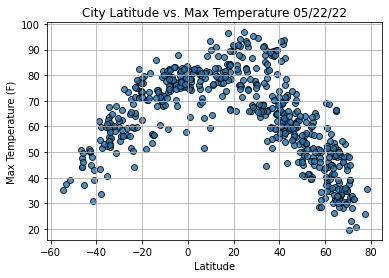

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

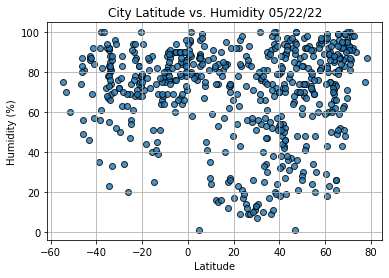

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


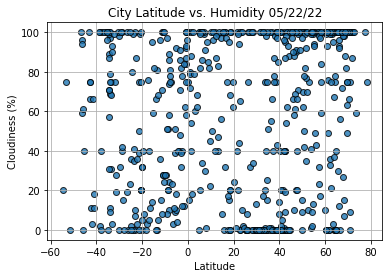

In [13]:
# Build the scatter plots for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

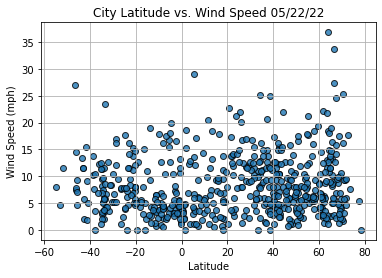

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2022-05-22 21:07:24,70.6333,147.9167,32.49,100,100,1.63
2,Paamiut,GL,2022-05-22 21:03:11,61.9940,-49.6678,34.68,88,100,22.17
4,Katsuura,JP,2022-05-22 21:07:25,35.1333,140.3000,66.31,88,51,11.12
5,Hilo,US,2022-05-22 21:07:26,19.7297,-155.0900,89.28,66,75,8.05
6,Norman Wells,CA,2022-05-22 21:07:26,65.2820,-126.8329,48.02,49,100,2.57


In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

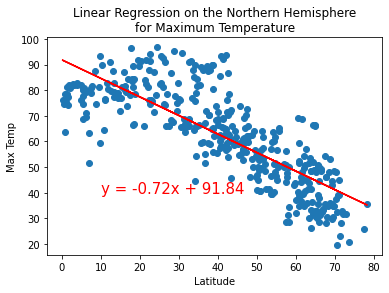

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(10,40))

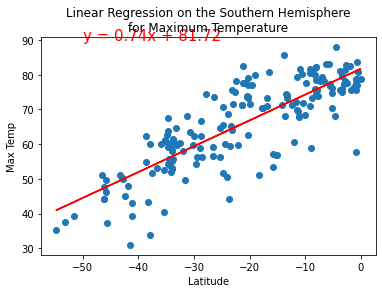

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(-50,90))

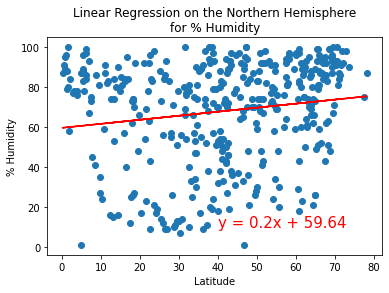

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', '% Humidity',(40,10))

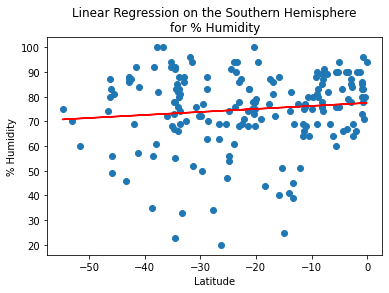

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity', '% Humidity',(-50,15))

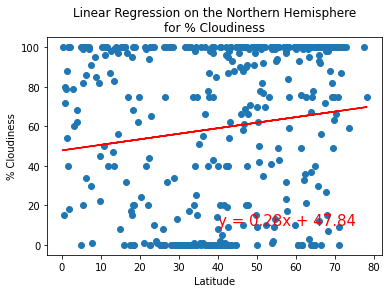

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', '% Cloudiness',(40,10))

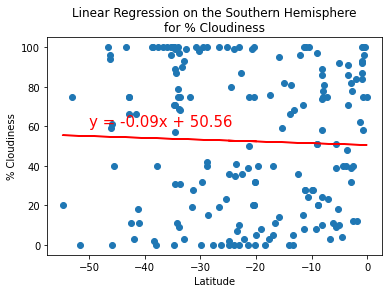

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness', '% Cloudiness',(-50,60))

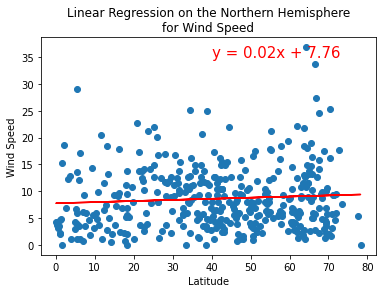

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed',(40,35))

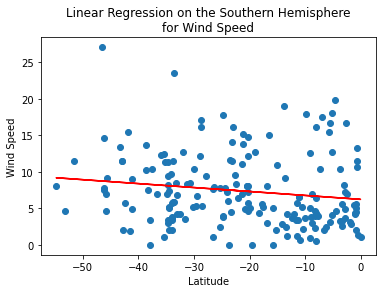

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 'Wind Speed',(-50,35))